In [11]:
# run this to shorten the data import from the files
path_data = '/home/nero/Documents/Estudos/DataCamp/Python/Advanced_Deep_Learning_with_Keras/datasets/'

import pandas as pd
import numpy as np

In [12]:
from tensorflow import keras
from keras.layers import Input, Dense, Concatenate

In [13]:
team_strength_model = keras.models.load_model(path_data + 'team_strength_model.h5')
team_strength_model.summary()

Model: "Team-Strength-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 Team-Strength (Embedding)   (None, 1, 1)              10888     
                                                                 
 flatten_2 (Flatten)         (None, 1)                 0         
                                                                 
Total params: 10,888
Trainable params: 10,888
Non-trainable params: 0
_________________________________________________________________


In [14]:
# exercise 01

"""
Make an input layer for home vs. away

Now you will make an improvement to the model you used in the previous chapter for regular season games. You know there is a well-documented home-team advantage in basketball, so you will add a new input to your model to capture this effect.

This model will have three inputs: team_id_1, team_id_2, and home. The team IDs will be integers that you look up in your team strength model from the previous chapter, and home will be a binary variable, 1 if team_1 is playing at home, 0 if they are not.

The team_strength_model you used in the previous chapter has been loaded into your workspace. After applying it to each input, use a Concatenate layer to join the two team strengths and with the home vs away variable, and pass the result to a Dense layer.
"""

# Instructions

"""

    Create three inputs layers of shape 1, one each for team 1, team 2, and home vs away.
    Lookup the team inputs in team_strength_model().
    Concatenate the team strengths with the home input and pass to a Dense layer.

"""

# solution

# Create an Input for each team
team_in_1 = Input(shape=(1,), name='Team-1-In')
team_in_2 = Input(shape=(1,), name='Team-2-In')

# Create an input for home vs away
home_in = Input(shape=(1,), name='Home-In')

# Lookup the team inputs in the team strength model
team_1_strength = team_strength_model(team_in_1)
team_2_strength = team_strength_model(team_in_2)

# Combine the team strengths with the home input using a Concatenate layer, then add a Dense layer
out = Concatenate()([team_1_strength, team_2_strength, home_in])
out = Dense(1)(out)

#----------------------------------#

# Conclusion

"""
Now you have a model with 3 inputs!
"""

'\nNow you have a model with 3 inputs!\n'

In [25]:
# exercise 02

"""
Make a model and compile it

Now that you've input and output layers for the 3-input model, wrap them up in a Keras model class, and then compile the model, so you can fit it to data and use it to make predictions on new data.
"""

# Instructions

"""

    Create a model using team_in_1, team_in_2, and home_in as inputs and out as the output.
    Compile the model using the 'adam' optimizer and 'mean_absolute_error' as the loss function.

"""

# solution

# Import the model class
from tensorflow.keras.models import Model

# Make a Model
model = Model([team_in_1, team_in_2, home_in], out)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

#----------------------------------#

# Conclusion

"""
Now our 3-input model is ready to meet some data!
"""

'\nNow our 3-input model is ready to meet some data!\n'

In [26]:
games_season = pd.read_csv(path_data + 'games_season.csv')
games_season.head()

,season,team_1,team_2,home,score_diff,score_1,score_2,won
0,1985,3745,6664,0,17,81,64,1
1,1985,126,7493,1,7,77,70,1
2,1985,288,3593,1,7,63,56,1
3,1985,1846,9881,1,16,70,54,1
4,1985,2675,10298,1,12,86,74,1


In [27]:
games_tourney = pd.read_csv(path_data + 'games_tourney.csv')

games_tourney.head()

,season,team_1,team_2,home,seed_diff,score_diff,score_1,score_2,won
0,1985,288,73,0,-3,-9,41,50,0
1,1985,5929,73,0,4,6,61,55,1
2,1985,9884,73,0,5,-4,59,63,0
3,1985,73,288,0,3,9,50,41,1
4,1985,3920,410,0,1,-9,54,63,0


In [28]:
# exercise 03

"""
Fit the model and evaluate

Now that you've defined a new model, fit it to the regular season basketball data.

Use the model you fit in the previous exercise (which was trained on the regular season data) and evaluate the model on data for tournament games (games_tourney).
"""

# Instructions

"""

    Fit the model to the games_season dataset, using 'team_1', 'team_2' and 'home' columns as inputs, and the 'score_diff' column as the target.
    Fit the model using 1 epoch, 10% validation split and a batch size of 2048.
    Evaluate the model on games_tourney, using the same inputs and outputs.

"""

# solution

# Fit the model to the games_season dataset
model.fit([games_season['team_1'], games_season['team_2'], games_season['home']],
          games_season['score_diff'],
          epochs=1,
          verbose=True,
          validation_split=0.10,
          batch_size=2048)

# Evaluate the model on the games_tourney dataset
print(model.evaluate([games_tourney['team_1'], games_tourney['team_2'], games_tourney['home']],
          games_tourney['score_diff'], verbose=False))

#----------------------------------#

# Conclusion

"""
Well done! Its time to further explore this model.
"""

138/138 [==============================] - 9s 29ms/step - loss: 12.2729 - val_loss: 11.5653
11.680888175964355


'\nWell done! Its time to further explore this model.\n'

In [30]:
mdl_path = '/home/nero/Documents/Estudos/DataCamp/Python/Advanced_Deep_Learning_with_Keras/models/' + 'model_1.png'

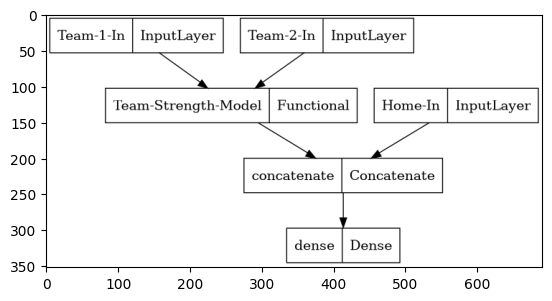

'\nCorrect! Its time to move on to stacked models.\n'

In [31]:
# exercise 04

"""
Plotting models

In addition to summarizing your model, you can also plot your model to get a more intuitive sense of it. Your model is available in the workspace.
"""

# Instructions

"""

    Save the model plot to the file 'model.png'.
    Import and display 'model.png' into Python using matplotlib.
---

"""

# solution

# Imports
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# Plot the model
plot_model(model, to_file= mdl_path)

# Display the image
data = plt.imread(mdl_path)
plt.imshow(data)
plt.show()

#----------------------------------#

# Conclusion

"""
Correct! Its time to move on to stacked models.
"""

In [32]:
# exercise 05

"""
Add the model predictions to the tournament data

In lesson 1 of this chapter, you used the regular season model to make predictions on the tournament dataset, and got pretty good results! Try to improve your predictions for the tournament by modeling it specifically.

You'll use the prediction from the regular season model as an input to the tournament model. This is a form of "model stacking."

To start, take the regular season model from the previous lesson, and predict on the tournament data. Add this prediction to the tournament data as a new column.
"""

# Instructions

"""
Use the model to predict on the games_tourney dataset. The model has three inputs: 'team_1', 'team_2', and 'home' columns. Assign the predictions to a new column, 'pred'.
"""

# solution

# Predict
games_tourney['pred'] = model.predict([games_tourney['team_1'],games_tourney['team_2'],games_tourney['home']])

#----------------------------------#

# Conclusion

"""
Now you can try building a model for the tournament data based on your regular season predictions.
"""

133/133 [==============================] - 1s 2ms/step


'\nNow you can try building a model for the tournament data based on your regular season predictions.\n'

In [33]:
# exercise 06

"""
Create an input layer with multiple columns

In this exercise, you will look at a different way to create models with multiple inputs. This method only works for purely numeric data, but its a much simpler approach to making multi-variate neural networks.

Now you have three numeric columns in the tournament dataset: 'seed_diff', 'home', and 'pred'. In this exercise, you will create a neural network that uses a single input layer to process all three of these numeric inputs.

This model should have a single output to predict the tournament game score difference.
"""

# Instructions

"""

    Create a single input layer with 3 columns.
    Connect this input to a Dense layer with 1 unit.
    Create a model with input_tensor as the input and output_tensor as the output.
    Compile the model with 'adam' as the optimizer and 'mean_absolute_error' as the loss function.

"""

# solution

# Create an input layer with 3 columns
input_tensor = Input((3,))

# Pass it to a Dense layer with 1 unit
output_tensor = Dense(1)(input_tensor)

# Create a model
model = Model(input_tensor, output_tensor)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

#----------------------------------#

# Conclusion

"""
Now your model is ready to meet some data!
"""

'\nNow your model is ready to meet some data!\n'

In [38]:
games_tourney_train = games_tourney.iloc[:3168, :]
games_tourney_test = games_tourney.iloc[3169:, :]

In [37]:
# exercise 07

"""
Fit the model

Now that you've enriched the tournament dataset and built a model to make use of the new data, fit that model to the tournament data.

Note that this model has only one input layer that is capable of handling all 3 inputs, so it's inputs and outputs do not need to be a list.

Tournament games are split into a training set and a test set. The tournament games before 2010 are in the training set, and the ones after 2010 are in the test set.
"""

# Instructions

"""

    Fit the model to the games_tourney_train dataset using 1 epoch.
    The input columns are 'home', 'seed_diff', and 'pred'.
    The target column is 'score_diff'.

"""

# solution

# Fit the model
model.fit(games_tourney_train[['home', 'seed_diff', 'pred']],
          games_tourney_train['score_diff'],
          epochs=1,
          verbose=True)

#----------------------------------#

# Conclusion

"""
In the next exercise, you'll see if our model is any good!
"""

99/99 [==============================] - 1s 3ms/step - loss: 11.0595


"\nIn the next exercise, you'll see if our model is any good!\n"

In [39]:
# exercise 08

"""
Evaluate the model

Now that you've fit your model to the tournament training data, evaluate it on the tournament test data. Recall that the tournament test data contains games from after 2010.
"""

# Instructions

"""

    Evaluate the model on the games_tourney_test data.
    Recall that the model's inputs are 'home', 'seed_diff', and 'prediction' columns and the target column is 'score_diff'.

"""

# solution

# Evaluate the model on the games_tourney_test dataset
print(model.evaluate(games_tourney_test[['home','seed_diff','pred']],
               games_tourney_test['score_diff'], verbose=False))

#----------------------------------#

# Conclusion

"""
Your model works pretty well on data in the future!
"""

10.381385803222656


'\nYour model works pretty well on data in the future!\n'